# Name : Bhavik Ransubhe
# Class : B.E (B) COMPUTER
# Roll No. : 41261

### PROBLEM STATEMENT : 

*Trip History Analysis: Use trip history dataset that is from a bike sharing service in the United States. The data is provided quarter-wise from 2010 (Q4) onwards. Each file has 7 columns. Predict the class of user. Sample Test data set available here https://www.capitalbikeshare.com/trip-history-data*

In [1]:
#import libraries
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import tree, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics  import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
#Load data
data=pd.read_csv('tripdata.csv')

In [3]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,552,2018-01-01 00:05:06,2018-01-01 00:14:18,31104,Adams Mill & Columbia Rd NW,31400,Georgia & New Hampshire Ave NW,W00886,Member
1,1282,2018-01-01 00:14:30,2018-01-01 00:35:53,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W01435,Casual
2,1265,2018-01-01 00:14:53,2018-01-01 00:35:58,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W21242,Casual
3,578,2018-01-01 00:15:31,2018-01-01 00:25:09,31406,14th & Upshur St NW,31103,16th & Harvard St NW,W21322,Casual
4,372,2018-01-01 00:18:02,2018-01-01 00:24:15,31618,4th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00119,Member


In [4]:
data.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [5]:
data = data.drop('Start date',axis=1)
data = data.drop('End date',axis=1)
data = data.drop('Start station',axis=1)
data = data.drop('End station',axis=1)
data = data.drop('Bike number',axis=1)

In [6]:
data.head()

,Duration,Start station number,End station number,Member type
0,552,31104,31400,Member
1,1282,31321,31321,Casual
2,1265,31321,31321,Casual
3,578,31406,31103,Casual
4,372,31618,31619,Member


In [7]:
# convert Member type to int value representation
# 1 - Registered Memeber
# 0 - Casual Member

le = LabelEncoder()
le.fit(data['Member type'])
data['Member type'] = le.transform(data['Member type'])

In [8]:
data.head()

,Duration,Start station number,End station number,Member type
0,552,31104,31400,1
1,1282,31321,31321,0
2,1265,31321,31321,0
3,578,31406,31103,0
4,372,31618,31619,1


In [9]:
data.shape

(168590, 4)

In [10]:
#Split data for training and testing set
X = data.drop(['Member type'],axis=1).values
y = data['Member type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)

### Models
**1. Using Logistic Regression :**

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_acc = accuracy_score(y_test,lr_predicted)
print("Accuracy:",lr_acc)

Accuracy: 0.9104138244656662


C:\Users\bhavi\.Origin\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1, 'Confusion Matrix')

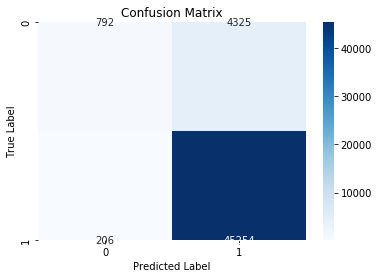

In [12]:
conf_matrix = confusion_matrix(y_test, lr_predicted)
sns.heatmap(conf_matrix, annot=True,fmt="d",cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [13]:
confusion_matrix(y_test, lr_predicted)

tn_lr = confusion_matrix(y_test, lr_predicted)[0,0]
fp_lr = confusion_matrix(y_test, lr_predicted)[0,1]
tp_lr = confusion_matrix(y_test, lr_predicted)[1,1]
fn_lr = confusion_matrix(y_test, lr_predicted)[1,0]

precison_lr = tp_lr/(tp_lr+fp_lr)
recall_lr = tp_lr/(tp_lr+fn_lr)

print("Precision: ", precison_lr)
print("Recall: ", recall_lr)

Precision:  0.9127654853869582
Recall:  0.995468543774747


**2. Using Gaussian Naive Bayes :**

In [14]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_predicted = GNB.predict(X_test)
GNB_acc = accuracy_score(y_test,GNB_predicted)
print("Accuracy:",GNB_acc)

Accuracy: 0.9077446270043695


Text(0.5, 1, 'Confusion Matrix')

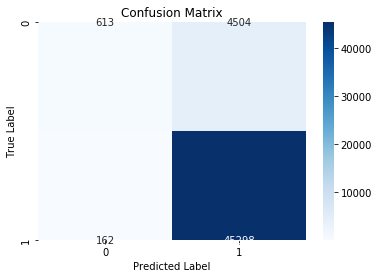

In [15]:
conf_matrix = confusion_matrix(y_test, GNB_predicted)
sns.heatmap(conf_matrix, annot=True,fmt="d",cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [16]:
tn_GNB = confusion_matrix(y_test, GNB_predicted)[0,0]
fp_GNB = confusion_matrix(y_test, GNB_predicted)[0,1]
tp_GNB = confusion_matrix(y_test, GNB_predicted)[1,1]
fn_GNB = confusion_matrix(y_test, GNB_predicted)[1,0]

precison_GNB = tp_GNB/(tp_GNB+fp_GNB)
recall_GNB = tp_GNB/(tp_GNB+fn_GNB)

print("Precision: ", precison_GNB)
print("Recall: ", recall_GNB)

Precision:  0.909561864985342
Recall:  0.9964364276286846


**3. Using Decision Tree  :**

In [17]:
DTC = tree.DecisionTreeClassifier(max_depth=10)
DTC.fit(X_train, y_train)
DTC_predicted = DTC.predict(X_test)
DTC_acc = accuracy_score(y_test,DTC_predicted)
print("Accuracy:",DTC_acc)

Accuracy: 0.9238191272712893


Text(0.5, 1, 'Confusion Matrix')

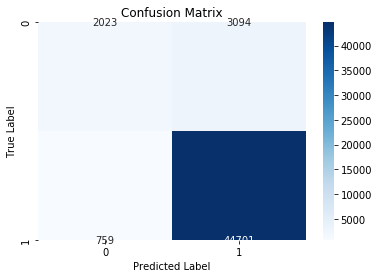

In [18]:
conf_matrix = confusion_matrix(y_test, DTC_predicted)
sns.heatmap(conf_matrix, annot=True,fmt="d",cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [19]:
tn_DTC = confusion_matrix(y_test, DTC_predicted)[0,0]
fp_DTC = confusion_matrix(y_test, DTC_predicted)[0,1]
tp_DTC = confusion_matrix(y_test, DTC_predicted)[1,1]
fn_DTC = confusion_matrix(y_test, DTC_predicted)[1,0]

precison_DTC = tp_DTC/(tp_DTC+fp_DTC)
recall_DTC = tp_DTC/(tp_DTC+fn_DTC)

print("Precision: ", precison_DTC)
print("Recall: ", recall_DTC)

Precision:  0.9352651951040903
Recall:  0.9833040035195777


**Comparing all models accuracy**

In [20]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, lr_acc),
          ('Gaussian Naive Bayes', tp_GNB, fp_GNB, tn_GNB, fn_GNB, GNB_acc),
          ('Decision Tree Classifier', tp_DTC, fp_DTC, tn_DTC, fn_DTC, DTC_acc)
         ]

predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy
0,Logistic Regression,45254,4325,792,206,0.910414
1,Gaussian Naive Bayes,45298,4504,613,162,0.907745
2,Decision Tree Classifier,44701,3094,2023,759,0.923819


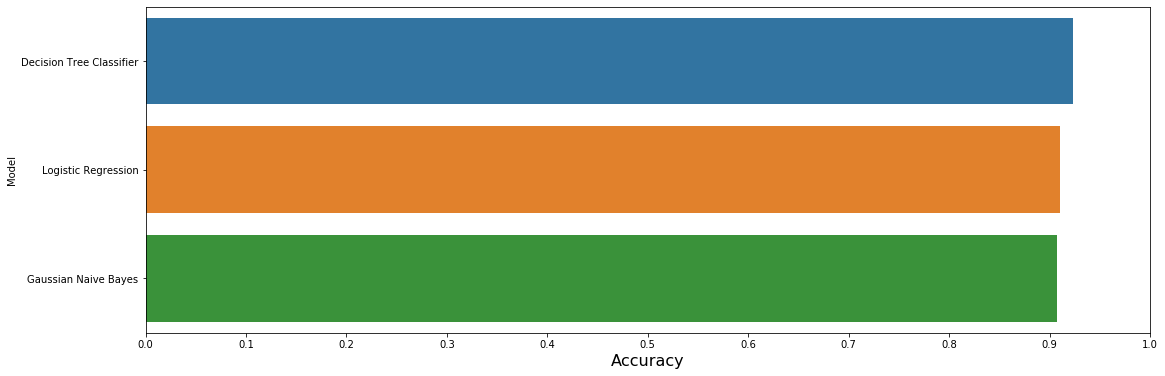

In [21]:
f, axe = plt.subplots(1,1, figsize=(18,6))
predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Accuracy', y='Model', data = predict, ax = axe)
axe.set_xlabel('Accuracy', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()